In [1]:
import cv2
import os
import random
import shutil

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
influencers_data = './../data/influencers.csv'

In [3]:
df_influencers = pd.read_csv(influencers_data)

In [4]:
df_influencers.head()

,username,category,num_followers,num_followees,num_posts
0,makeupbynvs,beauty,1432.0,1089.0,363.0
1,jaquelinevandoski,beauty,137600.0,548.0,569.0
2,anisaartistry,beauty,64644.0,289.0,391.0
3,rubina_muartistry,beauty,496406.0,742.0,887.0
4,beautyxabbi,beauty,2050.0,1423.0,751.0


In [5]:
beauty_influencers_count = df_influencers[df_influencers['category'] == 'beauty'].username.count()

print(f"Beauty influencers count: {beauty_influencers_count}")

Beauty influencers count: 1541


In [6]:
NUM_OF_INFLUENCERS = 10
NUM_OF_FILES_PER_INFLUENCER = 10
SEED_NUMBER = 8

In [7]:
src_image_folders_base = '/Users/mshayganfar/Mahni_Folder/Mahni/Influencers/images/'
dst_image_folders_base = '/Users/mshayganfar/Mahni_Folder/Mahni/Influencers/Beauty/subset_images/'
resized_image_folders_base = '/Users/mshayganfar/Mahni_Folder/Mahni/Influencers/Beauty/resized_images/'
image_classes_folder_base = '/Users/mshayganfar/Mahni_Folder/Mahni/Influencers/Beauty/Classes/'
test_image_folder_base = '/Users/mshayganfar/Mahni_Folder/Mahni/Influencers/Test/beauty/'

### Image Preparation

In [ ]:
def load_image(image_path, image_name):
    image = cv2.imread(os.path.join(image_path, image_name))
    # print(os.path.join(image_path, image_name))
    return image

In [ ]:
def resize_image(src_image, width, height):
    # print('Original Image Dimensions: ', src_image.shape)
    
    dim = (width, height)
    
    # resize image
    resized_image = cv2.resize(src_image, dim, interpolation=cv2.INTER_AREA)
    
    # print('Resized Image Dimensions : ', resized_image.shape)
    
    return resized_image

In [ ]:
def save_image(image_path, image_name, image):
    cv2.imwrite(os.path.join(image_path , image_name), image)

In [ ]:
# Resizing and saving subsampled images into a new folder

def save_resized_images(dst_image_folder, resized_image_folder):
    
    filenames = os.listdir(dst_image_folder + '.')
    
    for filename in filenames:
        if filename[-3:] == 'jpg':
            loaded_image  = load_image(dst_image_folder, filename)
            resized_image = resize_image(loaded_image, 50, 50)
            save_image(resized_image_folder, 'small_' + filename, resized_image)

### Get Subset of Influencers' Images

In [ ]:
# Randomly picking N usernames

def get_random_usernames(df, influencers_count, num_of_influencers, verbose):
    username_list = []

    random.seed(SEED_NUMBER)
    random_numbers = random.sample(range(0, influencers_count-1), num_of_influencers)

    for row_index in random_numbers:
        username_list.append(df.iloc[row_index].username)

    if verbose:
        print(username_list)
    
    return username_list

In [ ]:
# Extracting image file names

def extract_image_file_names(username_list, src_image_folder):

    filenames_list = []

    for username in username_list:
        first_char = username[0]
        if first_char.isalpha() == False:
            first_char = '_'
        # check if file exist in destination
        if os.path.exists(src_image_folder + first_char):
            specific_folder = src_image_folder + first_char + '/'
            filenames = [filename for filename in os.listdir(specific_folder + '.') if filename.startswith(username)]
            filenames_list.append(filenames)
        else:
            print(f"Folder {first_char} doesn't exist!")
            
    return filenames_list

In [ ]:
# Subsampling image files for all of the influencers

def get_influencers_random_subsampled_files(filenames_list, num_of_files_per_influencer):
    
    subsampled_filename_list = []

    random.seed(SEED_NUMBER)

    for i in range(0, len(filenames_list)):
        influencer_image_filenames = []
        random_numbers = random.sample(range(0, len(filenames_list[i])-1), num_of_files_per_influencer)

        for file_index in random_numbers:
            influencer_image_filenames.append(filenames_list[i][file_index])

        subsampled_filename_list.append(influencer_image_filenames)
        
    return subsampled_filename_list

In [ ]:
# Copying the subsampled files into the destination folder

def copy_influencers_files(subsampled_filenames, src_folder_base, dst_folder_base):

    for i in range(0, len(subsampled_filenames)):
        for j in range(0, len(subsampled_filenames[i])):
            filename = subsampled_filenames[i][j]
            first_char = filename[0]
            if first_char.isalpha() == False:
                first_char = '_'
            # check if file exist in destination
            if os.path.exists(src_folder_base + first_char):
                specific_src_folder = src_folder_base + first_char + '/'
                shutil.copy(specific_src_folder + filename, dst_folder_base + filename)
            else:
                print(f"Folder {first_char} doesn't exist!")

In [ ]:
# usernames = get_random_usernames(df_influencers, beauty_influencers_count, NUM_OF_INFLUENCERS, True)

In [ ]:
# filenames = extract_image_file_names(usernames, src_image_folders_base)

In [ ]:
# influencers_subsampled_filenames = get_influencers_random_subsampled_files(filenames, NUM_OF_FILES_PER_INFLUENCER)

In [ ]:
# copy_influencers_files(influencers_subsampled_filenames, src_image_folders_base, dst_image_folders_base)

In [ ]:
# save_resized_images(dst_image_folders_base, resized_image_folders_base)

### Get Specific Influencer's Images

In [ ]:
# Reading N files of a specific influencer

def get_influencer_files(image_folder, username):

    first_char = username[0]
    if first_char.isalpha() == False:
        first_char = '_'
    # check if file exist in destination
    if os.path.exists(image_folder + first_char):
        specific_folder = image_folder + first_char + '/'
        filenames = [filename for filename in os.listdir(specific_folder + '.') if filename.startswith(username)]
    else:
        print(f"Folder {first_char} doesn't exist!")

    return filenames

In [ ]:
# Subsampling image files

def get_influencr_random_subsampled_files(filenames, number_of_files):
    
    subsampled_filename_list = []

    random.seed(SEED_NUMBER)

    random_numbers = random.sample(range(0, len(filenames)), number_of_files)
    
    for file_index in random_numbers:
        subsampled_filename_list.append(filenames[file_index])
        
    return subsampled_filename_list

In [ ]:
# Copying the subsampled files into the destination folder

def copy_influencer_files(filenames, src_folder_base, dst_folder_base):
    
    for i in range(0, len(filenames)):
        filename = filenames[i]
        first_char = filename[0]
        if first_char.isalpha() == False:
            first_char = '_'
        # check if file exist in destination
        if os.path.exists(src_folder_base + first_char):
            specific_src_folder = src_folder_base + first_char + '/'
            shutil.copy(specific_src_folder + filename, dst_image_folders_base + filename)
        else:
            print(f"Folder {first_char} doesn't exist!")

In [ ]:
# influencer_filenames = get_influencer_files(src_image_folders_base, 'zodieac')

In [ ]:
# influencer_subsampled_filenames = get_influencr_random_subsampled_files(influencer_filenames, 150)

In [ ]:
# copy_influencer_files(influencer_subsampled_filenames, src_image_folders_base, dst_image_folders_base)

In [ ]:
# save_resized_images(dst_image_folders_base, resized_image_folders_base)

## Preparing Files

In [8]:
from PIL import Image
import tensorflow as tf

from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Activation
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation, RandomCrop, RandomZoom, RandomContrast
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img

In [9]:
sampled_filenames_dict = {'eye':[], 'face':[], 'hair':[], 'lips':[], 'nail':[], 'products':[]}

In [10]:
batch_size = 32
image_height = 50
image_width = 50

In [11]:
eye_images = image_classes_folder_base + 'Eye/'

In [ ]:
# Reading original image file names

for category in list(sampled_filenames_dict.keys()):
    # check if file exists in destination
    specific_folder = image_classes_folder_base + category.capitalize() + '/' + category + '/'
    filenames = [filename for filename in os.listdir(specific_folder + '.') if filename.endswith('.jpg')]
    sampled_filenames_dict[category] = filenames

    print(f"Category {category} is done: {len(filenames)}")

In [ ]:
rows = 5
columns = 4

datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             brightness_range=(0.6, 2.0),
                             shear_range=10,
                             zoom_range=0.2,
                             rotation_range=40,
                             horizontal_flip=True,
                             vertical_flip=True)

for category in list(sampled_filenames_dict.keys()):
    # check if file exists in destination
    specific_folder = image_classes_folder_base + category.capitalize() + '/' + category + '/'

    for filename in sampled_filenames_dict[category]:
        img = load_img(specific_folder + filename)
        image_data = img_to_array(img)
        images_data = np.expand_dims(image_data, axis=0)

        train_generator = datagen.flow(images_data, batch_size=20)

        # fig, axes = plt.subplots(rows, columns)

        for r in range(rows):
            for c in range(columns):
                image_batch = train_generator.next()

                image = image_batch[0].astype('uint8')

                # axes[r,c].imshow(image)

                im = Image.fromarray(image)
                im.save(specific_folder + f'{r}_{c}_augmented_' + filename)

        # fig.set_size_inches(10,10)

        # fig, axes = plt.subplots(rows, columns)

        # for r in range(rows):
            # for c in range(columns):
                # img = load_img(eye_folder + f'{r}_{c}_augmented_' + filename)

                # axes[r,c].imshow(img)

        # fig.set_size_inches(11,10)

In [42]:
sampled_filenames_dict = {'eye':[], 'face':[], 'hair':[], 'lips':[], 'nail':[], 'products':[]}

In [43]:
# Reading augmented + original image file names

for category in list(sampled_filenames_dict.keys()):
    # check if file exists in destination
    specific_folder = image_classes_folder_base + category.capitalize() + '/' + category + '/'
    filenames = [filename for filename in os.listdir(specific_folder + '.') if filename.endswith('.jpg')]
    sampled_filenames_dict[category] = filenames

    print(f"Category {category} is done: {len(filenames)}")

Category eye is done: 6636
Category face is done: 18102
Category hair is done: 5208
Category lips is done: 4725
Category nail is done: 4662
Category products is done: 7728


In [ ]:
# Copying files from other categories into the "not_<category>" folders

for category in sampled_filenames_dict:
    number_of_files = len(sampled_filenames_dict[category])
    number_of_files_per_category = number_of_files//5
    for other_category in list(sampled_filenames_dict.keys()):
        if other_category != category:
            number_of_files_in_other_category = len(sampled_filenames_dict[other_category])
            random_numbers = random.sample(range(0, number_of_files_in_other_category-1), 
                                           min(number_of_files_per_category, number_of_files_in_other_category))
            for file_index in random_numbers:
                filename = sampled_filenames_dict[other_category][file_index]
                src_folder = image_classes_folder_base + other_category.capitalize() + '/' + other_category + '/'
                dst_folder = image_classes_folder_base + category.capitalize() + '/not_' + category + '/'
                if os.path.exists(src_folder + filename):
                    shutil.copy(src_folder + filename, dst_folder + filename)
                else:
                    print(f"File {filename} doesn't exist in this {src_folder}!")

    print(f"Category {category} is done: {number_of_files}")

In [ ]:
# This cell contains test code:

img = load_img(test_folder + 'small_thekriksters-2023929871599882830.jpg')

image_data = img_to_array(img)

images_data = np.expand_dims(image_data, axis=0)

datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             brightness_range=(0.6, 2.0),
                             shear_range=10,
                             zoom_range=0.2,
                             rotation_range=40,
                             horizontal_flip=True,
                             vertical_flip=True)

train_generator = datagen.flow(images_data, batch_size=20)

rows = 5
columns = 4

fig, axes = plt.subplots(rows, columns)

for r in range(rows):
    for c in range(columns):
        image_batch = train_generator.next()
        
        image = image_batch[0].astype('uint8')

        axes[r,c].imshow(image)
        

        im = Image.fromarray(image)
        im.save(augmented_folder+f'{r}_{c}_augmented_small_thekriksters-2023929871599882830.jpg')

fig.set_size_inches(10,10)

fig, axes = plt.subplots(rows, columns)

for r in range(rows):
    for c in range(columns):
        img = load_img(augmented_folder + f'{r}_{c}_augmented_small_thekriksters-2023929871599882830.jpg')
        
        axes[r,c].imshow(img)

fig.set_size_inches(11,10)

## Beauty >> Eye Classifier

In [13]:
eye_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    eye_images,
    labels='inferred',
    label_mode='int',
    class_names=['eye', 'not_eye'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.25,
    subset="training"
)

Found 13271 files belonging to 2 classes.
Using 9954 files for training.


In [14]:
eye_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    eye_images,
    labels='inferred',
    label_mode='int',
    class_names=['eye', 'not_eye'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.25,
    subset="validation"
)

Found 13271 files belonging to 2 classes.
Using 3317 files for validation.


In [15]:
eye_model = Sequential()

# CONVOLUTIONAL LAYER
eye_model.add(Conv2D(filters=32,
                     kernel_size=(3, 3), input_shape=(50, 50, 3)))

# BATCH NORMALIZATION
eye_model.add(BatchNormalization())

eye_model.add(Activation('relu'))

# POOLING LAYER
eye_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
eye_model.add(Conv2D(filters=64,
                     kernel_size=(3, 3)))

# BATCH NORMALIZATION
eye_model.add(BatchNormalization())

eye_model.add(Activation('relu'))

# POOLING LAYER & DROPOUT
eye_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
eye_model.add(Conv2D(filters=128,
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     kernel_size=(3, 3)))

# BATCH NORMALIZATION
eye_model.add(BatchNormalization())

eye_model.add(Activation('relu'))

# POOLING LAYER & DROPOUT
eye_model.add(MaxPool2D(pool_size=(2, 2)))

eye_model.add(Dropout(0.2))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
eye_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
eye_model.add(Dense(128, 
                    kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                    activation='relu'))

eye_model.add(Dropout(0.2))

# 64 NEURONS IN DENSE HIDDEN LAYER
eye_model.add(Dense(64, activation='relu'))

# LAST LAYER IS THE CLASSIFIER
eye_model.add(Dense(1, activation='sigmoid'))

In [16]:
eye_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 22, 22, 64)       2

In [17]:
eye_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

In [18]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [19]:
eye_history = eye_model.fit(eye_train_images,
                            validation_data=eye_validation_images,
                            epochs=150,
                            callbacks=[early_stop])

Epoch 1/150
312/312 [==============================] - 24s 76ms/step - loss: 3.2888 - accuracy: 0.8317 - val_loss: 1.0151 - val_accuracy: 0.8821
Epoch 2/150
312/312 [==============================] - 24s 77ms/step - loss: 0.8008 - accuracy: 0.8824 - val_loss: 0.8072 - val_accuracy: 0.8209
Epoch 3/150
312/312 [==============================] - 24s 77ms/step - loss: 0.5878 - accuracy: 0.9048 - val_loss: 1.0754 - val_accuracy: 0.6403
Epoch 4/150
312/312 [==============================] - 23s 74ms/step - loss: 0.5271 - accuracy: 0.9135 - val_loss: 0.5425 - val_accuracy: 0.9029
Epoch 5/150
312/312 [==============================] - 23s 73ms/step - loss: 0.5602 - accuracy: 0.9141 - val_loss: 0.5717 - val_accuracy: 0.8643
Epoch 6/150
312/312 [==============================] - 23s 72ms/step - loss: 0.4804 - accuracy: 0.9208 - val_loss: 0.4009 - val_accuracy: 0.9304
Epoch 7/150
312/312 [==============================] - 24s 76ms/step - loss: 0.3993 - accuracy: 0.9319 - val_loss: 0.8326 - val_ac

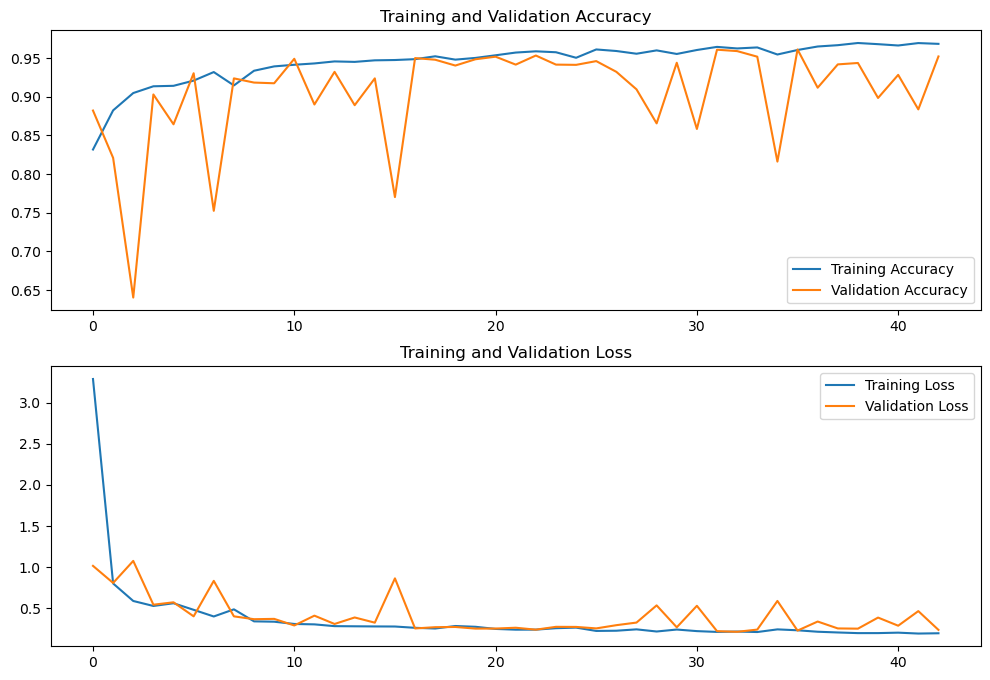

In [20]:
acc = eye_history.history['accuracy']
val_acc = eye_history.history['val_accuracy']

loss = eye_history.history['loss']
val_loss = eye_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
# Prepare augmentation

# data_augmentation = Sequential([
#     RandomFlip("horizontal"),
#     RandomRotation(factor=0.2),
#     RandomTranslation(height_factor=0.1, width_factor=0.1),
#     RandomContrast(factor=0.1),
# ])

In [ ]:
# AUTOTUNE = tf.data.AUTOTUNE

# def prepare(ds, shuffle=False, augment=False):
    
#     if shuffle:
#         ds = ds.shuffle(1000)

#     # Use data augmentation only on the training set.
#     if augment:
#         ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y))

#     # Use buffered prefetching on all datasets.
#     return ds.prefetch(buffer_size=AUTOTUNE)

# eye_train_images = prepare(eye_train_images, shuffle=True, augment=True)
# eye_validation_images = prepare(eye_validation_images)

### Testing Beauty >> Eye Classifier

In [21]:
test_image_eye_folder_base = test_image_folder_base + 'Eye/'

In [22]:
eye_test_images = tf.keras.preprocessing.image_dataset_from_directory(
    test_image_eye_folder_base,
    labels='inferred',
    label_mode='int',
    class_names=['eye', 'not_eye'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None
)

Found 24 files belonging to 2 classes.


In [23]:
eye_predictions = eye_model.predict(eye_test_images)
print(eye_predictions)

[[9.9227691e-01]
 [9.9873936e-01]
 [1.8919468e-02]
 [6.7333281e-03]
 [9.9835575e-01]
 [9.5716548e-01]
 [6.0436726e-03]
 [3.2380223e-04]
 [7.2067976e-03]
 [4.9159229e-03]
 [9.2937469e-01]
 [9.9954462e-01]
 [9.9948013e-01]
 [9.9430704e-01]
 [9.9839324e-01]
 [3.3850193e-02]
 [1.2541449e-01]
 [9.9170429e-01]
 [5.6689197e-01]
 [9.7432250e-01]
 [9.9953723e-01]
 [2.3785260e-01]
 [9.7829640e-01]
 [9.0150785e-01]]


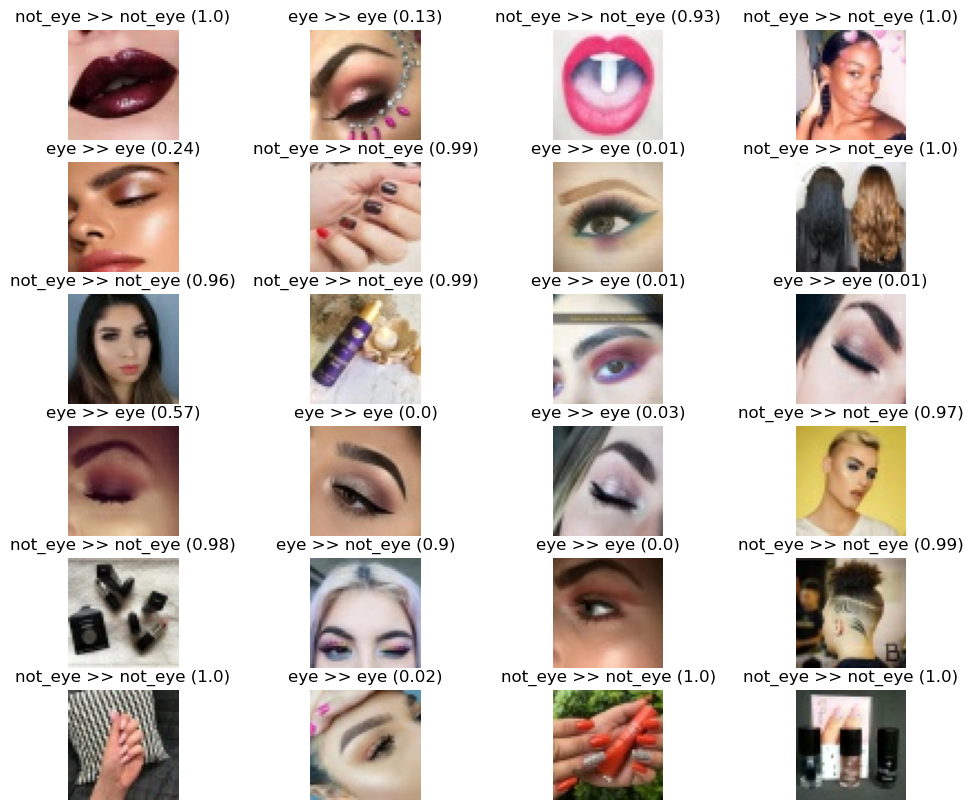

In [26]:
plt.figure(figsize=(12, 10))

for images, labels in eye_test_images.take(1):
    for i in range(len(images)):
        eye_prediction = eye_model.predict(tf.reshape(images[i], [-1, 50, 50, 3]))
        ax = plt.subplot(6, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        eye_label = 'not_eye' if eye_prediction[0][0] > 0.75 else 'eye'
        image_title = eye_test_images.class_names[labels[i]]+' >> '+eye_label+' ('+str(round(eye_prediction[0][0], 2))+')'
        plt.title(image_title)
        plt.axis("off")

## Beauty >> Lips Classifier

In [27]:
lips_images = image_classes_folder_base + 'Lips/'

In [84]:
lips_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    lips_images,
    labels='inferred',
    label_mode='int',
    class_names=['lips', 'not_lips'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset="training"
)

Found 9450 files belonging to 2 classes.
Using 6615 files for training.


In [85]:
lips_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    lips_images,
    labels='inferred',
    label_mode='int',
    class_names=['lips', 'not_lips'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset="validation"
)

Found 9450 files belonging to 2 classes.
Using 2835 files for validation.


In [108]:
lips_model = Sequential()

# CONVOLUTIONAL LAYER
lips_model.add(Conv2D(filters=32,
                      kernel_size=(3, 3), input_shape=(50, 50, 3)))

# BATCH NORMALIZATION
lips_model.add(BatchNormalization())

lips_model.add(Activation('relu'))

# POOLING LAYER
lips_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
lips_model.add(Conv2D(filters=64,
                      kernel_size=(3, 3)))

# BATCH NORMALIZATION
lips_model.add(BatchNormalization())

lips_model.add(Activation('relu'))

# POOLING LAYER & DROPOUT
lips_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
lips_model.add(Conv2D(filters=128,
                      kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                      kernel_size=(3, 3)))

# BATCH NORMALIZATION
lips_model.add(BatchNormalization())

lips_model.add(Activation('relu'))

# POOLING LAYER & DROPOUT
lips_model.add(MaxPool2D(pool_size=(2, 2)))

# lips_model.add(Dropout(0.2))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
lips_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
lips_model.add(Dense(128, 
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     activation='relu'))

# lips_model.add(Dropout(0.2))

# 64 NEURONS IN DENSE HIDDEN LAYER
lips_model.add(Dense(64, activation='relu'))

# LAST LAYER IS THE CLASSIFIER
lips_model.add(Dense(1, activation='sigmoid'))

In [109]:
lips_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 batch_normalization_16 (Bat  (None, 48, 48, 32)       128       
 chNormalization)                                                
                                                                 
 activation_27 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 batch_normalization_17 (Bat  (None, 22, 22, 64)      

In [110]:
lips_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [111]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [112]:
lips_history = lips_model.fit(lips_train_images,
                              validation_data=lips_validation_images,
                              epochs=150,
                              callbacks=[early_stop])

Epoch 1/150
207/207 [==============================] - 17s 80ms/step - loss: 4.0948 - accuracy: 0.8227 - val_loss: 1.3591 - val_accuracy: 0.8028
Epoch 2/150
207/207 [==============================] - 16s 77ms/step - loss: 0.8805 - accuracy: 0.8432 - val_loss: 0.7480 - val_accuracy: 0.8702
Epoch 3/150
207/207 [==============================] - 16s 76ms/step - loss: 0.6329 - accuracy: 0.8544 - val_loss: 0.5818 - val_accuracy: 0.8667
Epoch 4/150
207/207 [==============================] - 16s 76ms/step - loss: 0.5590 - accuracy: 0.8677 - val_loss: 0.6698 - val_accuracy: 0.7802
Epoch 5/150
207/207 [==============================] - 16s 76ms/step - loss: 0.5138 - accuracy: 0.8727 - val_loss: 0.8127 - val_accuracy: 0.7192
Epoch 6/150
207/207 [==============================] - 16s 76ms/step - loss: 0.4950 - accuracy: 0.8815 - val_loss: 0.5727 - val_accuracy: 0.8395
Epoch 7/150
207/207 [==============================] - 16s 77ms/step - loss: 0.4700 - accuracy: 0.8883 - val_loss: 0.4759 - val_ac

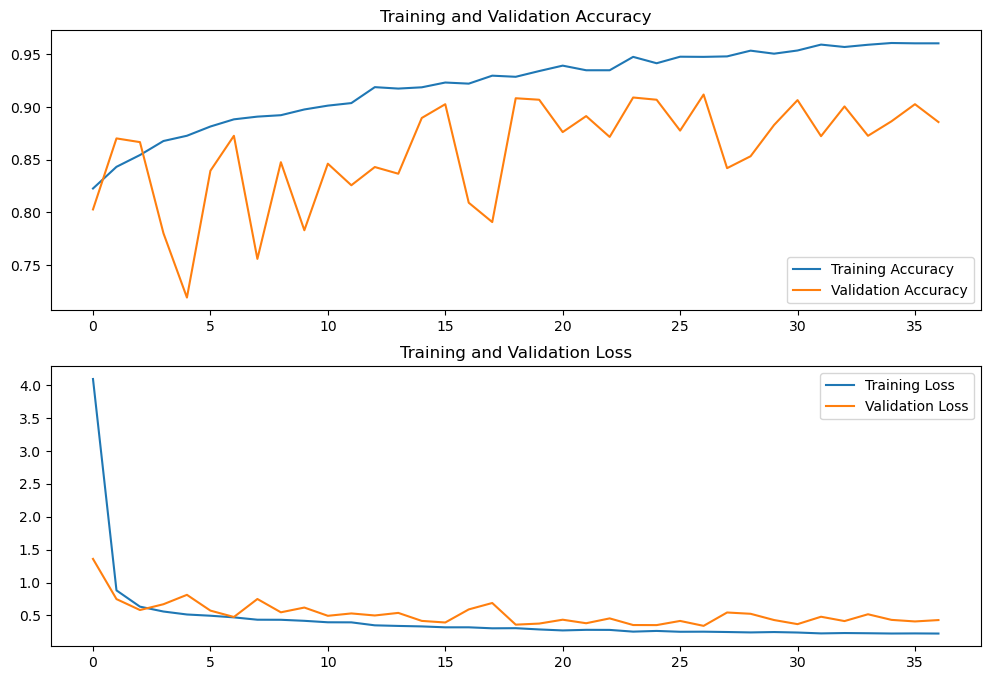

In [113]:
acc = lips_history.history['accuracy']
val_acc = lips_history.history['val_accuracy']

loss = lips_history.history['loss']
val_loss = lips_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

### Testing Beauty >> Lips Classifier

In [114]:
test_image_lips_folder_base = test_image_folder_base + 'Lips/'

In [115]:
lips_test_images = tf.keras.preprocessing.image_dataset_from_directory(
    test_image_lips_folder_base,
    labels='inferred',
    label_mode='int',
    class_names=['lips', 'not_lips'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None
)

Found 16 files belonging to 2 classes.


In [116]:
lips_predictions = lips_model.predict(lips_test_images)
print(lips_predictions)

[[9.6005303e-01]
 [9.9941999e-01]
 [9.9334174e-01]
 [9.9545181e-01]
 [9.9750233e-01]
 [9.9991155e-01]
 [1.6514152e-02]
 [9.7807276e-01]
 [9.8601991e-01]
 [9.8983347e-01]
 [9.7985899e-01]
 [8.6849469e-01]
 [8.5731089e-01]
 [1.1541182e-01]
 [5.8509879e-05]
 [9.8797411e-01]]


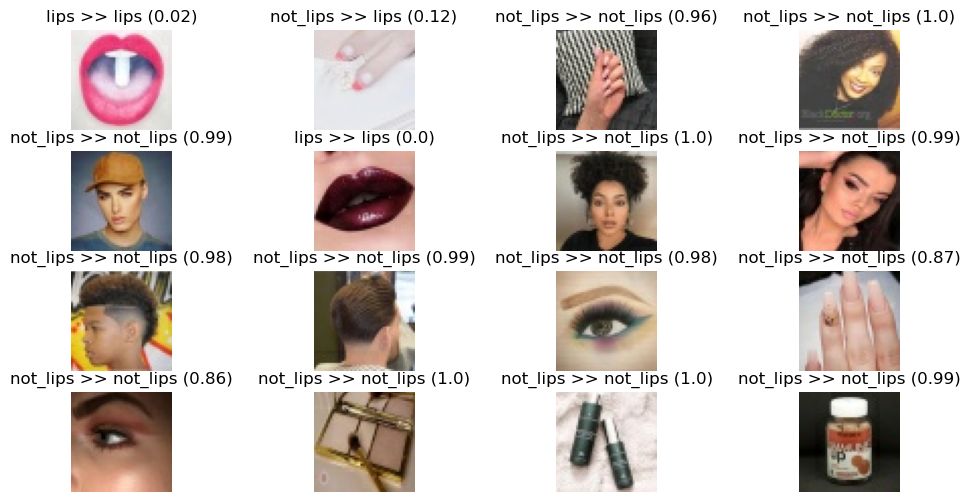

In [117]:
plt.figure(figsize=(12, 6))

for images, labels in lips_test_images.take(1):
    for i in range(len(images)):
        lips_prediction = lips_model.predict(tf.reshape(images[i], [-1, 50, 50, 3]))
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        lips_label = 'not_lips' if lips_prediction[0][0] > 0.5 else 'lips'
        image_title = lips_test_images.class_names[labels[i]]+' >> '+lips_label+' ('+str(round(lips_prediction[0][0], 2))+')'
        plt.title(image_title)
        plt.axis("off")

## Beauty >> Nail Classifier

In [41]:
nail_images = image_classes_folder_base + 'Nail/'

In [60]:
nail_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    nail_images,
    labels='inferred',
    label_mode='int',
    class_names=['nail', 'not_nail'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.35,
    subset="training"
)

Found 9322 files belonging to 2 classes.
Using 6060 files for training.


In [61]:
nail_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    nail_images,
    labels='inferred',
    label_mode='int',
    class_names=['nail', 'not_nail'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.35,
    subset="validation"
)

Found 9322 files belonging to 2 classes.
Using 3262 files for validation.


In [62]:
nail_model = Sequential()

# CONVOLUTIONAL LAYER
nail_model.add(Conv2D(filters=32,
                      kernel_size=(3, 3), input_shape=(50, 50, 3)))

# BATCH NORMALIZATION
#nail_model.add(BatchNormalization())

nail_model.add(Activation('relu'))

# POOLING LAYER
nail_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
nail_model.add(Conv2D(filters=64,
                      kernel_size=(3, 3)))

# BATCH NORMALIZATION
#nail_model.add(BatchNormalization())

nail_model.add(Activation('relu'))

# POOLING LAYER & DROPOUT
nail_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
nail_model.add(Conv2D(filters=128,
                      kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                      kernel_size=(3, 3)))

# BATCH NORMALIZATION
#nail_model.add(BatchNormalization())

nail_model.add(Activation('relu'))

# POOLING LAYER & DROPOUT
nail_model.add(MaxPool2D(pool_size=(2, 2)))

nail_model.add(Dropout(0.2))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
nail_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
nail_model.add(Dense(128, 
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     activation='relu'))

nail_model.add(Dropout(0.2))

# 64 NEURONS IN DENSE HIDDEN LAYER
nail_model.add(Dense(64, activation='relu'))

# LAST LAYER IS THE CLASSIFIER
nail_model.add(Dense(1, activation='sigmoid'))

In [63]:
nail_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 48, 48, 32)        896       
                                                                 
 activation_12 (Activation)  (None, 48, 48, 32)        0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 22, 22, 64)        18496     
                                                                 
 activation_13 (Activation)  (None, 22, 22, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 11, 11, 64)       0         
 g2D)                                                 

In [64]:
nail_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [65]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [66]:
nail_history = nail_model.fit(nail_train_images,
                              validation_data=nail_validation_images,
                              epochs=150,
                              callbacks=[early_stop])

Epoch 1/150
190/190 [==============================] - 10s 46ms/step - loss: 6.7730 - accuracy: 0.6083 - val_loss: 4.6465 - val_accuracy: 0.6695
Epoch 2/150
190/190 [==============================] - 8s 44ms/step - loss: 3.9420 - accuracy: 0.6909 - val_loss: 3.3704 - val_accuracy: 0.7354
Epoch 3/150
190/190 [==============================] - 8s 44ms/step - loss: 2.9293 - accuracy: 0.7269 - val_loss: 2.4881 - val_accuracy: 0.7793
Epoch 4/150
190/190 [==============================] - 8s 44ms/step - loss: 2.2701 - accuracy: 0.7500 - val_loss: 2.0160 - val_accuracy: 0.7575
Epoch 5/150
190/190 [==============================] - 8s 45ms/step - loss: 1.8207 - accuracy: 0.7680 - val_loss: 1.6579 - val_accuracy: 0.7728
Epoch 6/150
190/190 [==============================] - 8s 44ms/step - loss: 1.5050 - accuracy: 0.7706 - val_loss: 1.3401 - val_accuracy: 0.7885
Epoch 7/150
190/190 [==============================] - 8s 44ms/step - loss: 1.2273 - accuracy: 0.7982 - val_loss: 1.1307 - val_accuracy

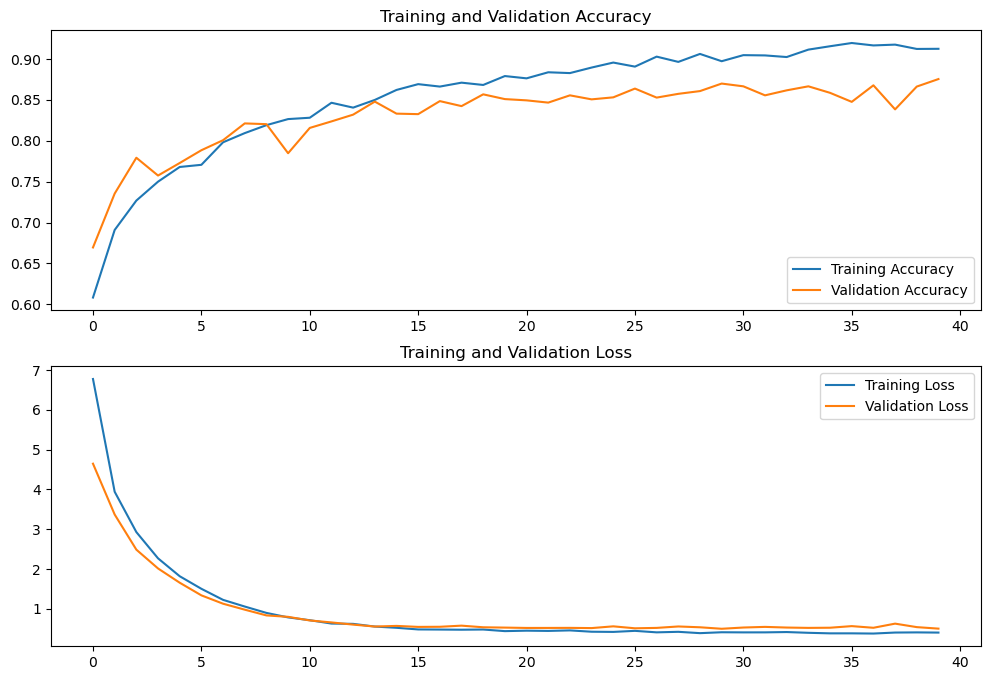

In [67]:
acc = nail_history.history['accuracy']
val_acc = nail_history.history['val_accuracy']

loss = nail_history.history['loss']
val_loss = nail_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

### Testing Beauty >> Nail Classifier

In [68]:
test_image_nail_folder_base = test_image_folder_base + 'Nail/'

In [69]:
nail_test_images = tf.keras.preprocessing.image_dataset_from_directory(
    test_image_nail_folder_base,
    labels='inferred',
    label_mode='int',
    class_names=['nail', 'not_nail'],
    color_mode='rgb',
    batch_size=36,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None
)

Found 36 files belonging to 2 classes.


In [70]:
nail_predictions = nail_model.predict(nail_test_images)
print(nail_predictions)

[[8.1012696e-02]
 [6.8947059e-01]
 [7.1426499e-01]
 [9.9835223e-01]
 [9.9998206e-01]
 [8.2788396e-01]
 [3.2776016e-01]
 [6.9353187e-01]
 [6.6542119e-02]
 [9.9258709e-01]
 [4.4016182e-02]
 [9.9447942e-01]
 [2.2202030e-01]
 [1.1557877e-02]
 [4.6063364e-03]
 [9.3058661e-06]
 [1.1739552e-02]
 [9.9692416e-01]
 [1.3455868e-02]
 [9.8336524e-01]
 [4.8466089e-01]
 [9.9999923e-01]
 [9.3490195e-01]
 [9.9206918e-01]
 [9.9955165e-01]
 [4.5140684e-03]
 [9.5549756e-01]
 [2.4721026e-04]
 [2.1609712e-01]
 [4.0074408e-02]
 [9.9948585e-01]
 [9.9854362e-01]
 [1.4942884e-03]
 [9.9857402e-01]
 [9.9994540e-01]
 [1.8693560e-01]]


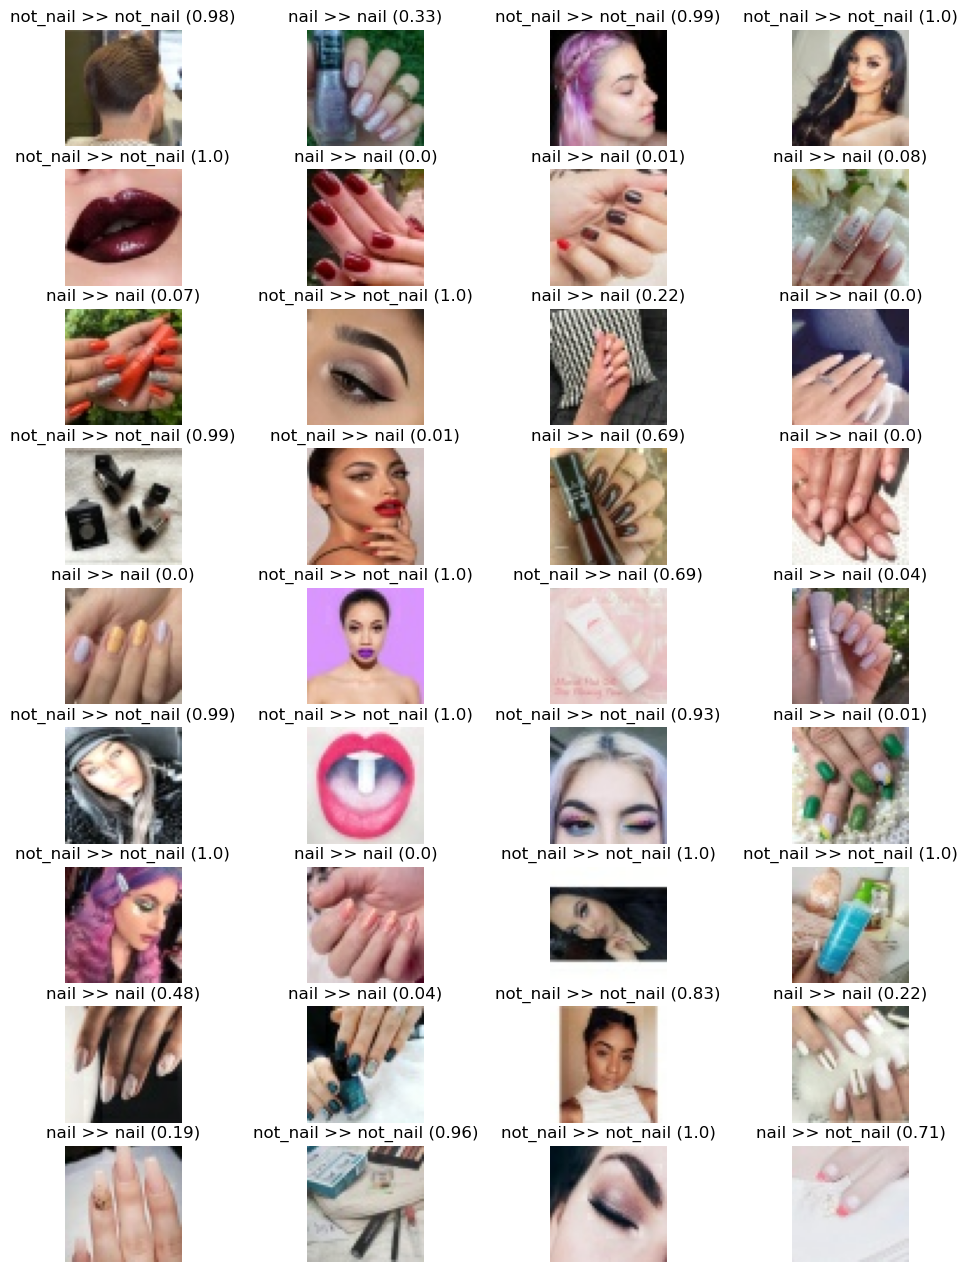

In [73]:
plt.figure(figsize=(12, 16))

for images, labels in nail_test_images.take(1):
    for i in range(len(images)):
        nail_prediction = nail_model.predict(tf.reshape(images[i], [-1, 50, 50, 3]))
        ax = plt.subplot(9, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        nail_label = 'not_nail' if nail_prediction[0][0] > 0.7 else 'nail'
        image_title = nail_test_images.class_names[labels[i]]+' >> '+nail_label+' ('+str(round(nail_prediction[0][0], 2))+')'
        plt.title(image_title)
        plt.axis("off")

## Beauty >> Hair Classifier

In [ ]:
hair_images = image_classes_folder_base + 'Hair/'

In [ ]:
hair_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    hair_images,
    labels='inferred',
    label_mode='int',
    class_names=['hair', 'not_hair'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset="training"
)

In [ ]:
hair_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    hair_images,
    labels='inferred',
    label_mode='int',
    class_names=['hair', 'not_hair'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset="validation"
)

In [ ]:
hair_model = Sequential()

# CONVOLUTIONAL LAYER
hair_model.add(Conv2D(filters=32,
                      kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                      kernel_size=(3, 3),
                      input_shape=(50, 50, 3),
                      activation='relu'))

# POOLING LAYER
hair_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
hair_model.add(Conv2D(filters=64,
                      kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                      kernel_size=(3, 3),
                      activation='relu'))

# POOLING LAYER & DROPOUT
hair_model.add(MaxPool2D(pool_size=(2, 2)))
hair_model.add(Dropout(0.5))

# CONVOLUTIONAL LAYER
hair_model.add(Conv2D(filters=64,
                      kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                      kernel_size=(3, 3),
                      activation='relu'))

# POOLING LAYER & DROPOUT
hair_model.add(MaxPool2D(pool_size=(2, 2)))
hair_model.add(Dropout(0.5))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
hair_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
hair_model.add(Dense(128,
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     activation='relu'))
hair_model.add(Dropout(0.5))

# 64 NEURONS IN DENSE HIDDEN LAYER
hair_model.add(Dense(64,
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     activation='relu'))
hair_model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER
hair_model.add(Dense(1, activation='sigmoid'))

In [ ]:
hair_model.summary()

In [ ]:
hair_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
hair_history = hair_model.fit(hair_train_images,
                              validation_data=hair_validation_images,
                              epochs=200,
                              callbacks=[early_stop])

In [ ]:
acc = hair_history.history['accuracy']
val_acc = hair_history.history['val_accuracy']

loss = hair_history.history['loss']
val_loss = hair_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

### Testing Beauty >> Hair Classifier

In [ ]:
test_image_hair_folder_base = test_image_folder_base + 'Hair/'

In [ ]:
hair_test_images = tf.keras.preprocessing.image_dataset_from_directory(
    test_image_hair_folder_base,
    labels='inferred',
    label_mode='int',
    class_names=['hair', 'not_hair'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None
)

In [ ]:
hair_predictions = hair_model.predict(hair_test_images)
print(hair_predictions)

In [ ]:
plt.figure(figsize=(16, 12))
for images, labels in hair_test_images.take(1):
    for i in range(len(images)):
        hair_prediction = hair_model.predict(tf.reshape(images[i], [-1, 50, 50, 3]))
        ax = plt.subplot(6, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        hair_label = 'not_hair' if hair_prediction[0][0] > 0.5 else 'hair'
        image_title = hair_test_images.class_names[labels[i]]+' >> '+hair_label+' ('+str(round(hair_prediction[0][0], 2))+')'
        plt.title(image_title)
        plt.axis("off")

## Beauty >> Face Classifier

In [ ]:
face_images = image_classes_folder_base + 'Face/'

In [ ]:
face_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    face_images,
    labels='inferred',
    label_mode='int',
    class_names=['face', 'not_face'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset="training"
)

In [ ]:
face_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    face_images,
    labels='inferred',
    label_mode='int',
    class_names=['face', 'not_face'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset="validation"
)

In [ ]:
face_model = Sequential()

# CONVOLUTIONAL LAYER
face_model.add(Conv2D(filters=32,
                      kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                      kernel_size=(3, 3),
                      input_shape=(50, 50, 3),
                      activation='relu'))

# POOLING LAYER
face_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
face_model.add(Conv2D(filters=64,
                      kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                      kernel_size=(3, 3),
                      activation='relu'))

# POOLING LAYER & DROPOUT
face_model.add(MaxPool2D(pool_size=(2, 2)))
face_model.add(Dropout(0.5))

# CONVOLUTIONAL LAYER
face_model.add(Conv2D(filters=64,
                      kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                      kernel_size=(3, 3),
                      activation='relu'))

# POOLING LAYER & DROPOUT
face_model.add(MaxPool2D(pool_size=(2, 2)))
face_model.add(Dropout(0.5))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
face_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
face_model.add(Dense(128,
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     activation='relu'))
face_model.add(Dropout(0.5))

# 64 NEURONS IN DENSE HIDDEN LAYER
face_model.add(Dense(64,
                     kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                     activation='relu'))
face_model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER
face_model.add(Dense(1, activation='sigmoid'))

In [ ]:
face_model.summary()

In [ ]:
face_model.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
face_history = face_model.fit(face_train_images,
                              validation_data=face_validation_images,
                              epochs=150,
                              callbacks=[early_stop])

In [ ]:
acc = face_history.history['accuracy']
val_acc = face_history.history['val_accuracy']

loss = face_history.history['loss']
val_loss = face_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

### Testing Beauty >> Face Classifier

In [ ]:
test_image_face_folder_base = test_image_folder_base + 'Face/'

In [ ]:
face_test_images = tf.keras.preprocessing.image_dataset_from_directory(
    test_image_face_folder_base,
    labels='inferred',
    label_mode='int',
    class_names=['face', 'not_face'],
    color_mode='rgb',
    batch_size=36,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None
)

In [ ]:
face_predictions = face_model.predict(face_test_images)
print(face_predictions)

In [ ]:
plt.figure(figsize=(16, 14))
for images, labels in face_test_images.take(1):
    for i in range(len(images)):
        face_prediction = face_model.predict(tf.reshape(images[i], [-1, 50, 50, 3]))
        ax = plt.subplot(7, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        face_label = 'not_face' if face_prediction[0][0] > 0.5 else 'face'
        image_title = face_test_images.class_names[labels[i]]+' >> '+face_label+' ('+str(round(face_prediction[0][0], 2))+')'
        plt.title(image_title)
        plt.axis("off")

## Beauty >> Products Classifier

In [ ]:
products_images = image_classes_folder_base + 'Products/'

In [ ]:
products_train_images = tf.keras.preprocessing.image_dataset_from_directory(
    products_images,
    labels='inferred',
    label_mode='int',
    class_names=['products', 'not_products'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset="training"
)

In [ ]:
products_validation_images = tf.keras.preprocessing.image_dataset_from_directory(
    products_images,
    labels='inferred',
    label_mode='int',
    class_names=['products', 'not_products'],
    color_mode='rgb',
    batch_size=batch_size,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=0.15,
    subset="validation"
)

In [ ]:
products_model = Sequential()

# CONVOLUTIONAL LAYER
products_model.add(Conv2D(filters=32,
                          kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                          kernel_size=(3, 3),
                          input_shape=(50, 50, 3),
                          activation='relu'))

# POOLING LAYER
products_model.add(MaxPool2D(pool_size=(2, 2)))

# CONVOLUTIONAL LAYER
products_model.add(Conv2D(filters=64,
                          kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                          kernel_size=(3, 3),
                          activation='relu'))

# POOLING LAYER & DROPOUT
products_model.add(MaxPool2D(pool_size=(2, 2)))
products_model.add(Dropout(0.5))

# CONVOLUTIONAL LAYER
products_model.add(Conv2D(filters=64,
                          kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                          kernel_size=(3, 3),
                          activation='relu'))

# POOLING LAYER & DROPOUT
products_model.add(MaxPool2D(pool_size=(2, 2)))
products_model.add(Dropout(0.5))

# FLATTEN IMAGES FROM 50 by 50 to 2500 BEFORE FINAL LAYER
products_model.add(Flatten(input_shape=(50, 50, 3)))

# 128 NEURONS IN DENSE HIDDEN LAYER
products_model.add(Dense(128,
                         kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                         activation='relu'))
products_model.add(Dropout(0.5))

# 64 NEURONS IN DENSE HIDDEN LAYER
products_model.add(Dense(64,
                         kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001),
                         activation='relu'))
products_model.add(Dropout(0.5))

# LAST LAYER IS THE CLASSIFIER
products_model.add(Dense(1, activation='sigmoid'))

In [ ]:
products_model.summary()

In [ ]:
products_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [ ]:
products_history = products_model.fit(products_train_images,
                                      validation_data=products_validation_images,
                                      epochs=200,
                                      callbacks=[early_stop])

In [ ]:
acc = products_history.history['accuracy']
val_acc = products_history.history['val_accuracy']

loss = products_history.history['loss']
val_loss = products_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

### Testing Beauty >> Products Classifier

In [ ]:
test_image_products_folder_base = test_image_folder_base + 'Products/'

In [ ]:
products_test_images = tf.keras.preprocessing.image_dataset_from_directory(
    test_image_products_folder_base,
    labels='inferred',
    label_mode='int',
    class_names=['products', 'not_products'],
    color_mode='rgb',
    batch_size=34,
    image_size=(image_height, image_width),
    shuffle=True,
    seed=42,
    validation_split=None,
    subset=None
)

In [ ]:
products_predictions = products_model.predict(products_test_images)
print(products_predictions)

In [ ]:
plt.figure(figsize=(16, 18))
for images, labels in products_test_images.take(1):
    for i in range(len(images)):
        products_prediction = products_model.predict(tf.reshape(images[i], [-1, 50, 50, 3]))
        ax = plt.subplot(9, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        products_label = 'not_products' if products_prediction[0][0] > 0.5 else 'products'
        image_title = products_test_images.class_names[labels[i]]+' >> '+products_label+' ('+str(round(products_prediction[0][0], 2))+')'
        plt.title(image_title)
        plt.axis("off")